# Numerical Methods Mid term Paper 

## Total Marks : 25

# Question #1 

Convert the following algorithms into python by using functions and then solve the following problem

Find the roots of the following equation

$2x^2 - 5x + 3 = 0$  analytical roots are $x = 1.5,1$

## Algorithm 1 (Secant Method)

1. Input two values for $x_1$ and $x_2$
2. Calculate $x_{new} = x_2 - \frac{x_2-x_1}{f(x_2)-f(x_1)}f(x_2)$
3. If $|x_{new} - x_2| < tolerance$ , output $x_{new}$ the root and stop
4. If number of iterations reaches the maximum, stop.
5. Else let $x_1=x_2$ and $x_2=x_{new}$
6. Repeat the steps from 2

## Algorithm 2 (Newton's Methd)


1. Find $f'(x)$ and define newton's raphson equation
2. Guess an initial value of x for the first iteration
3. substitute x in the NR equation and calculate $x^*$
4. if $|x^*-x|<tolerance$, stop iterations and output the root: $x^*$
5. if the number of interations reaches an assumed maximum, stop.
6. else let $x=x^*$ and repeat the steps from 3 until a condition in 4 or 5 is satisfied.

# Question # 2

Plot the first derivative of the following function over $[-1,1]$ by using the forward, backward and central differences.

Compare the plots with the theoretical one at $h = 0.1, 0.01$ and $0.001$

$f(x) = 0.1x^5 - 0.2x^3 + 0.1x - 0.2$

Theoretical :

$f'(x) = 0.5x^4 - 0.6x^2 + 0.1$

**Formulas are given for reference**

**FORWARD FINITE DIFFERENCES**

$f'(x) = \frac{f(x_{i+1})-f(x_i)}{h}$

$f''(x) = \frac{f(x_{i+2})-2f(x_{i+1})+f(x_i)}{h^2}$

**BACKWARD FINITE DIFFERENCES**

$f'(x) = \frac{f(x_{i}-f(x_i))}{h}$

$f''(x) = \frac{f(x_{i})-2f(x_{i-1})+f(x_{i-2})}{h^2}$

**CENTRAL FINITE DIFFERENCES**

$f'(x) = \frac{f(x_{i+1})-f(x_{i-1})}{2h}$

$f''(x) = \frac{f(x_{i+1})-2f(x_i)+f(x_{i-1})}{h^2}$


In [9]:
import numpy as np
import math

In [34]:
def secant(fn,x1,x2,tol,maxiter):
    for i in range(maxiter):
        xnew  = x2 - (x2-x1)/(fn(x2)-fn(x1))*fn(x2)
        if abs(xnew-x2) < tol:
            break
        else:
            x1 = x2
            x2 = xnew
    else:
        print('warning: Maximum number of iterations')
    return xnew, i

f = lambda x: 2*x**2 - 5*x + 3 

x1 = float(input('Enter value of x1: '))
x2 = float(input('Enter value of x2: '))

r, n = secant(f,x1,x2,1.0e-6,100)

print('Root = %f at %d iterations'%(r,n))

Enter value of x1: 2
Enter value of x2: 4
Root = 1.500000 at 8 iterations


In [11]:
import numpy as np
import math

In [37]:
def newton(fn,dfn,x,tol,maxiter):
    for i in range(maxiter):
        xnew = x - fn(x)/dfn(x)
        if abs(xnew-x)<tol:                          
            break
        x = xnew
    return xnew, i

y = lambda x: 2*x**2 - 5*x + 3 
dy = lambda x : 4*x - 5

x, n = newton(y, dy, 1, 0.0001, 100)
print('the root is %.3f at %d iterations.'%(x,n))

the root is 1.000 at 0 iterations.


In [35]:
import numpy as np
import math
import matplotlib.pyplot as plt
f = lambda x: 0.1*x**5 - 0.2*x**3 + 0.1*x -0.2

x = 0.1
h = 0.1

df1 = 0.09405
df2 = -0.118


print("\t f'(x)\t\t err\t\t f''(x)\t\t err")

# forward difference

dff1 = (f(x+h)  -  f(x))/h
dff2 = (f(x+2*h) - 2*f(x+h) + f(x))/h**2
print("FFD\t% .8f\t% .8f\t% .8f\t% .8f"%(dff1,dff1-df1,dff2,dff2-df2))

# backward difference

dff1 = (f(x) - f(x-h))/h
dff2 = (f(x) - 2*f(x-h) + f(x-2*h) )/h**2
print("BFD\t% .8f\t% .8f\t% .8f\t% .8f"%(dff1,dff1-df1,dff2,dff2-df2))

#  central differences

dff1 = (f(x+h) - f(x-h))/(2*h)
dff2 = (f(x+h) -  2*f(x) + f(x-h))/h**2
print("CFD\t% .8f\t% .8f\t% .8f\t% .8f"%(dff1,dff1-df1,dff2,dff2-df2))

	 f'(x)		 err		 f''(x)		 err
FFD	 0.08631000	-0.00774000	-0.22200000	-0.10400000
BFD	 0.09801000	 0.00396000	 0.00000000	 0.11800000
CFD	 0.09216000	-0.00189000	-0.11700000	 0.00100000


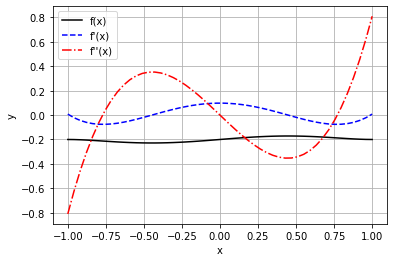

In [24]:
import numpy as np
import matplotlib.pyplot as plt
f=lambda x: 0.1*x**5 - 0.2*x**3 + 0.1*x - 0.2

h = 0.1
#will create an array of elements between -1 and 1 having 50 equal
x = np.linspace(-1,1,50)

dff1 = (f(x+h)-f(x-h))/(2*h)
dff2 = (f(x+h)-2*f(x)+f(x-h))/h**2
#plot
plt.plot(x,f(x),'-k',x,dff1,'--b',x,dff2,'-.r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["f(x)","f'(x)","f''(x)"])
plt.grid()

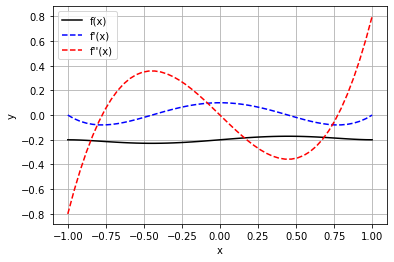

In [29]:
import numpy as np
import matplotlib.pyplot as plt
f=lambda x: 0.1*x**5 - 0.2*x**3 + 0.1*x - 0.2

h = 0.01
#will create an array of elements between -1 and 1 having 50 equal
x = np.linspace(-1,1,50)

dff1 = (f(x+h)-f(x-h))/(2*h)
dff2 = (f(x+h)-2*f(x)+f(x-h))/h**2
#plot
plt.plot(x,f(x),'-k',x,dff1,'--b',x,dff2,'--r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["f(x)","f'(x)","f''(x)"])
plt.grid()

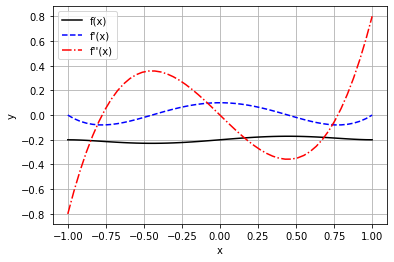

In [30]:
import numpy as np
import matplotlib.pyplot as plt
f=lambda x: 0.1*x**5 - 0.2*x**3 + 0.1*x - 0.2

h = 0.001
#will create an array of elements between -1 and 1 having 50 equal
x = np.linspace(-1,1,50)

dff1 = (f(x+h)-f(x-h))/(2*h)
dff2 = (f(x+h)-2*f(x)+f(x-h))/h**2
#plot
plt.plot(x,f(x),'-k',x,dff1,'--b',x,dff2,'-.r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["f(x)","f'(x)","f''(x)"])
plt.grid()